In [13]:
from dumbbells.dataset import *
from dumbbells.agent import *
from dumbbells.q_functions import *
from dumbbells.models import *
from dumbbells.trainer import *

import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
env = "CartPole-v1"
#env = "MountainCar-v0"
memory_buffer = 100_000  # 10000

gamma = 0.999
arch = FcSimpleDqn

eps_start = 0.9
eps_end = 0.05
eps_decay = 200  # 200

dataset = Dataset(env, memory_buffer)
arch = arch(dataset.state_space.shape[0], dataset.action_space.n)
q_func = DnnQFunction(arch, gamma)
agent = Agent(
    q_func, 
    dataset.action_space, 
    dataset.state_space, 
    dataset.reward_space, 
    eps_start, 
    eps_end, 
    eps_decay
)


In [15]:
trainer = Trainer(dataset, agent, offline_update=10, batch_size=1024)
trainer.train(10_000)

100%|██████████| 10000/10000 [01:21<00:00, 122.26it/s]


len(dataset) = 100000
len(trainer.ep_durations) = 10000


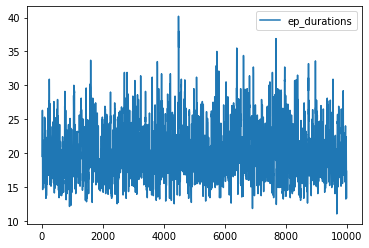

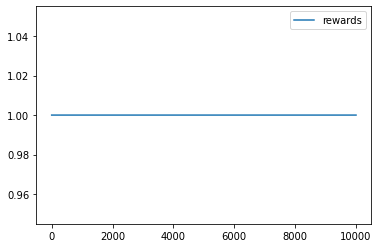

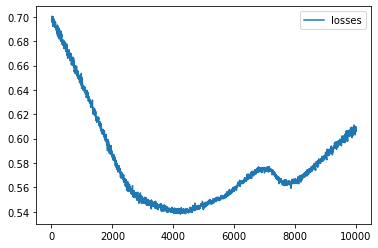

In [16]:
print(f"{len(dataset) = }")
print(f"{len(trainer.ep_durations) = }")

plt.plot(pd.Series(trainer.ep_durations).rolling(10).mean(), label="ep_durations")
plt.legend()
plt.show()

plt.plot(trainer.rewards, label="rewards")
plt.legend()
plt.show()

plt.plot(pd.Series(trainer.losses).rolling(10).mean(), label="losses")
plt.legend()
plt.show()